# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>

In [2]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats
from scipy.stats import kurtosis, skew
import seaborn as sns
import scipy.stats as stats
import pylab

In [3]:
df['temperature'].describe()

count    130.000000
mean      98.249231
std        0.733183
min       96.300000
25%       97.800000
50%       98.300000
75%       98.700000
max      100.800000
Name: temperature, dtype: float64

By looking at the histogram and the densitiy plot and comparing the plot with normal distribution plot,  the data looks close to a normal distributed.

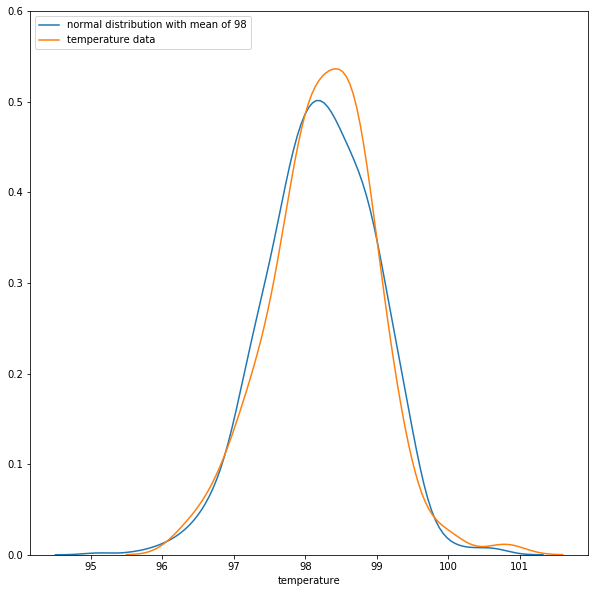

In [4]:
plt.figure(figsize=(10,10))
plt.ylim(0,0.6)
sns.distplot(np.random.normal(98.249231,0.733183, size=1000), hist=False, kde=True, label='normal distribution with mean of 98')
sns.distplot(df['temperature'], hist=False, kde=True, label='temperature data')
plt.legend(loc='upper left')


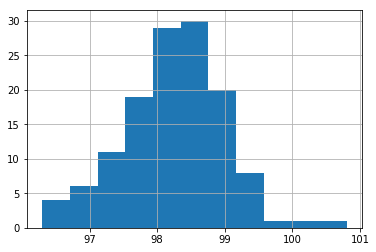

In [5]:
df['temperature'].hist(bins=int(np.sqrt(df['temperature'].count())))

By looking at the skewness and kurtosis of the temperature data, the data is not normally distributed.

In [6]:
print('excess kurtosis of normal distribution (should be 0)L {}'.format(kurtosis(df['temperature'])))
print('skewness of normal distribution of (should be 0): {}'.format(skew(df['temperature'])))

excess kurtosis of normal distribution (should be 0)L 0.7049597854114693
skewness of normal distribution of (should be 0): -0.004367976879081625


Create a ecdf for temperature data and normally distributed data and make the comparison:

In [7]:
sample_normal=np.random.normal(df['temperature'].mean(), df['temperature'].std(),size=len(df['temperature'])  )

In [8]:
def ecdf(data):
    n=len(df['temperature'])
    
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    
    return x, y
    
    

In [9]:
x_axis, y_axis=ecdf(df['temperature'])


In [10]:
x_normal_axis, y_normal_axis= ecdf(sample_normal)

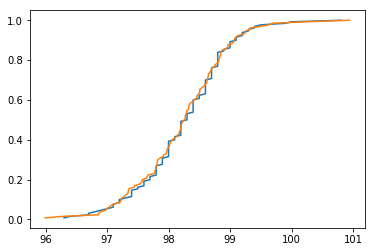

In [11]:
plt.plot(x_axis,y_axis, label='temperature data' )
plt.plot(x_normal_axis,y_normal_axis, label='normal distribution')

By comparing the ecdf of normal distribution and temperature, the temperature data looks normally distributed.

Below is the qq plot for the temperature data.
The temperature data is distributed along the line. So the data is normally distributed.

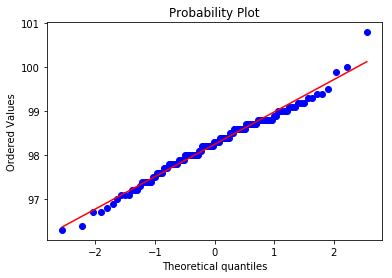

In [12]:
stats.probplot(df['temperature'], dist='norm', plot=pylab)

pylab.show()

<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>

For the sample to be independent, the sample size should be less than 10% of the whole population. There are only 130 observations in the sample. So the sample is indenpendent.

In [13]:
len(df)

130

<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

Hypothesis testing:
- Ho: True population mean is 98.6
- H1: True population mean is not 98.6

In [14]:
def func_bootstrap_sample(data, size):
    boostrap_data=np.empty(size)
    
    for i in range(size):
        mean=np.random.choice(data, size=size).mean()
        boostrap_data[i]=mean
    
    return boostrap_data

Take a thousand bootstrap from the temperature data:

In [15]:
temperature_bootstrap_1000=func_bootstrap_sample(df['temperature'], 1000)

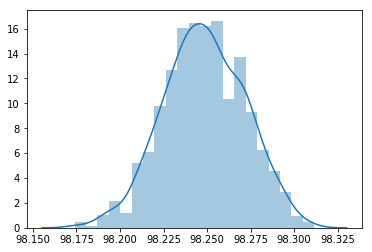

In [16]:
sns.distplot(pd.Series(temperature_bootstrap_1000))

In [17]:
p=np.sum(temperature_bootstrap_1000>=98.6)/len(temperature_bootstrap_1000)
print("P value:", p)

P value: 0.0


p value is close to 0. It seams the true population should be below 98.6. So we need to reject the null hypothesis.

Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?

This is a one sample two tail test because we are comparing one sample (sample parameter) against the null hypothesis population parameter.

In [18]:
population_mean=98.6
sample_mean=df['temperature'].mean()
sample_mean

98.24923076923078

In [19]:
SE=df['temperature'].std()/np.sqrt(len(df['temperature']))

In [20]:
test_stats=(sample_mean-population_mean)/SE
test_stats

-5.4548232923640789

In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>

In this situation, the sample data is close to normal distribution plus there are at least 30 observations. So using z statistic should be sufficient.

for both z test and t test, the p value is lower than 5%, which means the sample has reach stats sig. We should reject the null hypothesis that the mean temperature is 98.6.

In [146]:
len(df['temperature'])

130

<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>

In [151]:
small_sample=np.random.choice(df['temperature'], size=10)

In [164]:
small_sample.mean()

98.5

In [165]:
SE_small_sample=small_sample.std()/np.sqrt(len(small_sample))

In [166]:
SE_small_sample

0.20346989949375816

In [167]:
test_stats_small_sample=(small_sample.mean()-population_mean)/SE_small_sample

In [168]:
test_stats_small_sample

-0.49147318718296223

By using z test, the p value is around 0.623. By using t test,the p value is around 0.635. 

t test is more conservative and better to use for small sample size. z test is sufficient only when you have a larger sample size (usually more than 30 observations.)

<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>

In [169]:
SE=df['temperature'].std()/np.sqrt(len(df['temperature']))

In [171]:
ME_z_test_95_confidence_level=SE*1.96

In [174]:
cf_interval_upper_bound=sample_mean+ME_z_test_95_confidence_level

In [175]:
cf_interval_lower_bound=sample_mean-ME_z_test_95_confidence_level

In [176]:
print("95% confidence interval: from ", cf_interval_lower_bound, " to", cf_interval_upper_bound)

95% confidence interval: from  98.1231941122  to 98.3752674262


So we are 95% confident to conclude the temperature is abnormal is it falls outside of the range above.

<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>



z tes should be sufficient in this case to use since the sample size has over 30 observations.

Below is the hypothesis:
- Ho: female average temperature = male average temperature
- H1: female avarage temperature not equal to male average temperature

In [24]:
df_F=df.loc[df['gender']=='F']
df_M=df.loc[df['gender']=='M']

In [182]:
print("Female Temperature:")
print(df_F.describe())
print("\n")
print("Male Temperature:")
print(df_M.describe())

Female Temperature:
       temperature  heart_rate
count    65.000000   65.000000
mean     98.393846   74.153846
std       0.743488    8.105227
min      96.400000   57.000000
25%      98.000000   68.000000
50%      98.400000   76.000000
75%      98.800000   80.000000
max     100.800000   89.000000


Male Temperature:
       temperature  heart_rate
count    65.000000   65.000000
mean     98.104615   73.369231
std       0.698756    5.875184
min      96.300000   58.000000
25%      97.600000   70.000000
50%      98.100000   73.000000
75%      98.600000   78.000000
max      99.500000   86.000000


In [25]:
df_M.head()

,temperature,gender,heart_rate
2,97.8,M,73.0
5,99.2,M,83.0
6,98.0,M,71.0
7,98.8,M,78.0
12,98.2,M,72.0


In [26]:
avg_temp_diff_by_gender=df_M['temperature'].mean()-df_F['temperature'].mean()

In [27]:
temp_M_std=df_M['temperature'].std()
temp_F_std=df_F['temperature'].std()

In [28]:
SE=np.sqrt(temp_M_std**2/len(df_M['temperature']) + temp_F_std**2/len(df_F['temperature']))

In [31]:
z_stats_gender_diff=avg_temp_diff_by_gender/SE

In [32]:
z_stats_gender_diff

-2.2854345381652741

In [33]:
p_value= (1-0.9887)*2

In [34]:
p_value

0.022599999999999953

The p value is less than 5%. So the null hypothesis should be rejected. There's a significant difference between female and male temperature.